In [1]:
import os          
import cv2                                 
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from sklearn.metrics import *         
import matplotlib.pyplot as plt 
import sklearn.model_selection as model_selection

In [11]:
images = pd.read_csv('30_class_image.csv')

labels = pd.read_csv('30_class_labels.csv')

class_names = pd.read_csv('30_class_name.csv' )

In [12]:
images

,[[[255 255 255]\n [255 255 255]\n [255 255 255]\n ...\n [255 255 255]\n [255 255 255]\n [255 255 255]]\n\n [[255 255 255]\n [255 255 255]\n [255 255 255]\n ...\n [255 255 255]\n [255 255 255]\n [255 255 255]]\n\n [[255 255 255]\n [255 255 255]\n [255 255 255]\n ...\n [255 255 255]\n [255 255 255]\n [255 255 255]]\n\n ...\n\n [[255 255 255]\n [255 255 255]\n [255 255 255]\n ...\n [255 255 255]\n [255 255 255]\n [255 255 255]]\n\n [[255 255 255]\n [255 255 255]\n [255 255 255]\n ...\n [255 255 255]\n [255 255 255]\n [255 255 255]]\n\n [[255 255 255]\n [255 255 255]\n [255 255 255]\n ...\n [255 255 255]\n [255 255 255]\n [255 255 255]]]
0,[[[255 255 255]\n [255 255 255]\n [255 255 2...
1,[[[255 255 255]\n [255 255 255]\n [255 255 2...
2,[[[255 255 255]\n [255 255 255]\n [255 255 2...
3,[[[255 255 255]\n [255 255 255]\n [255 255 2...
4,[[[255 255 255]\n [255 255 255]\n [255 255 2...
...,...
1829,[[[255 255 255]\n [255 255 255]\n [255 255 2...
1830,[[[255 255 255]\n [255 255 255]\n [255 255 2...
1831,[[[255 255 255]\n [255 255 255]\n [255 255 2...
1832,[[[255 255 255]\n [255 255 255]\n [255 255 2...


In [9]:
images = images/255.0

TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [7]:
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101) 

ValueError: Found input variables with inconsistent numbers of samples: [1835, 1834]

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11944064  
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, batch_size=128, epochs = 5, validation_split = 0.2)

Epoch 1/5
10/10 [==============================] - 8s 124ms/step - loss: 5.3065 - accuracy: 0.0392 - val_loss: 3.3563 - val_accuracy: 0.0442
Epoch 2/5
10/10 [==============================] - 1s 59ms/step - loss: 3.0839 - accuracy: 0.1865 - val_loss: 2.7890 - val_accuracy: 0.2075
Epoch 3/5
10/10 [==============================] - 1s 54ms/step - loss: 2.1448 - accuracy: 0.4293 - val_loss: 2.0550 - val_accuracy: 0.4218
Epoch 4/5
10/10 [==============================] - 1s 52ms/step - loss: 1.2988 - accuracy: 0.6533 - val_loss: 1.4493 - val_accuracy: 0.5748
Epoch 5/5
10/10 [==============================] - 0s 50ms/step - loss: 0.9215 - accuracy: 0.7257 - val_loss: 1.1738 - val_accuracy: 0.6939


In [15]:
test_loss = model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 10ms/step - loss: 1.3362 - accuracy: 0.6185


In [16]:
predictions = np.argmax(model.predict(test_images), axis = 1)
actual = test_labels

In [17]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(actual,predictions),index = class_names, columns =class_names)

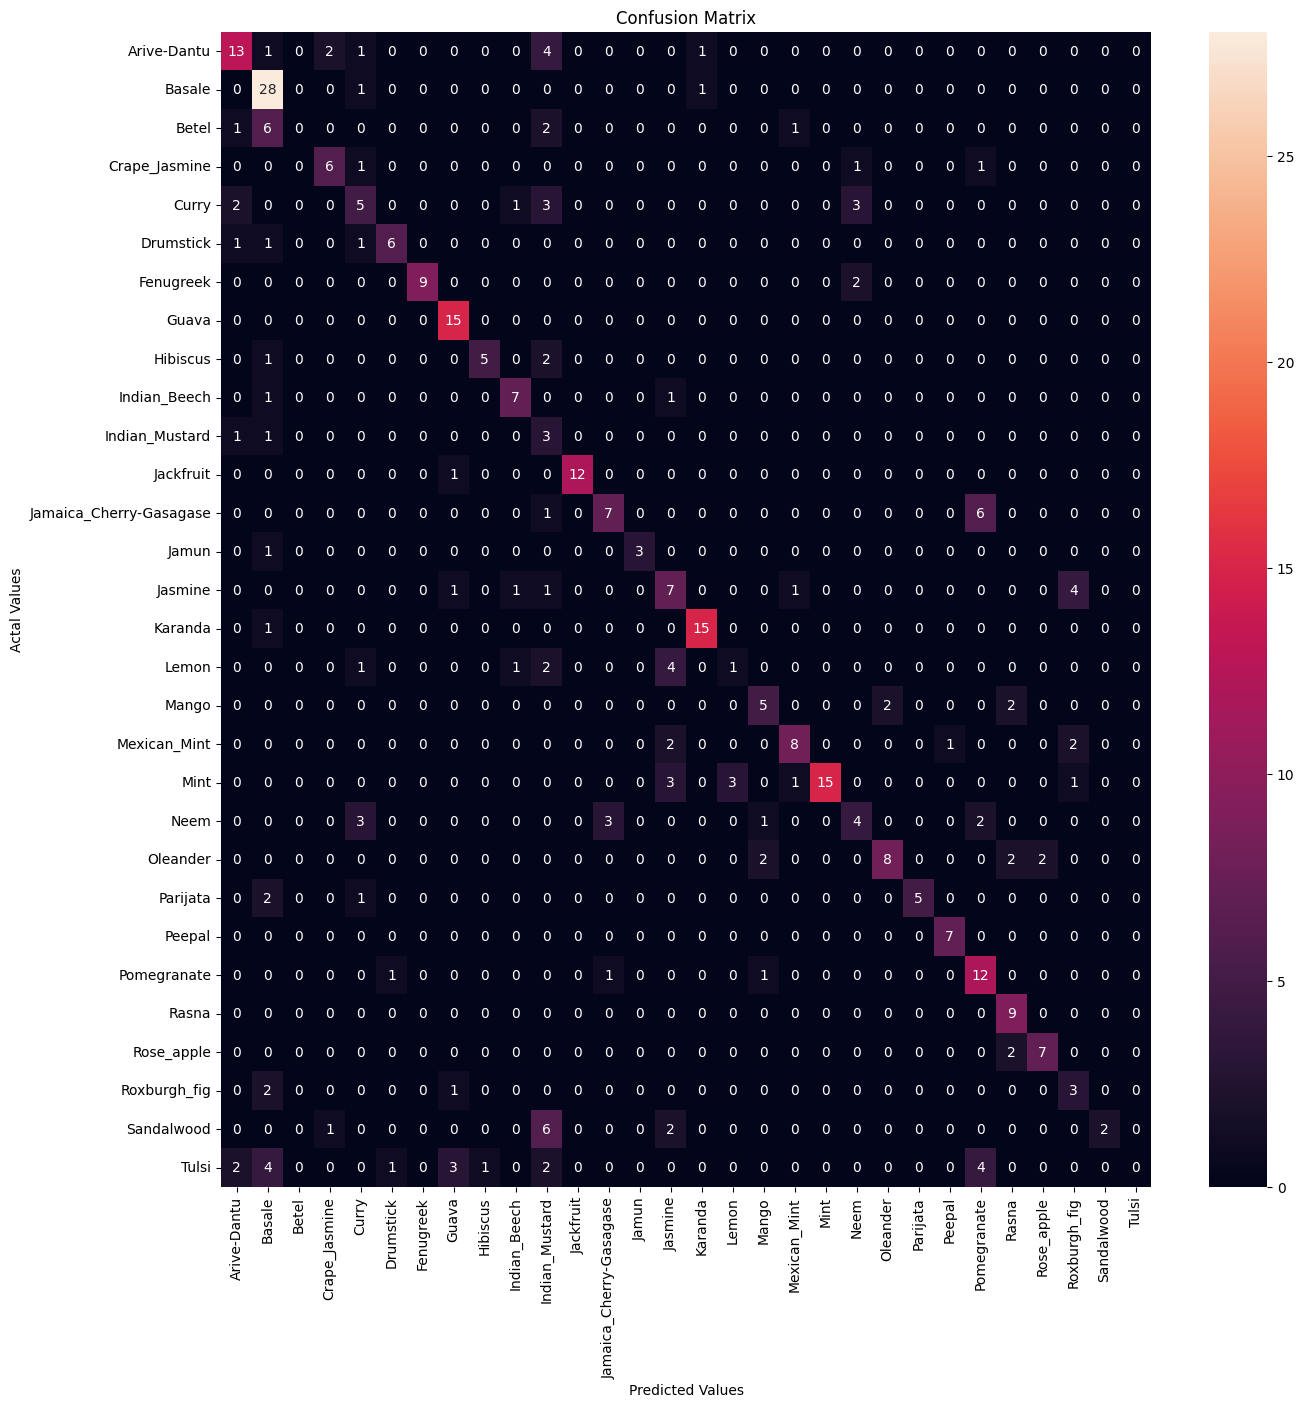

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()